In [4]:
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

import seaborn as sns
import matplotlib.pyplot as plt

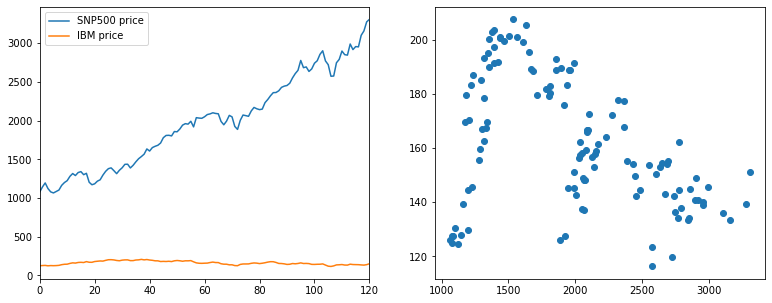

In [8]:
ibm_data = pd.read_csv('../Data/IBM.csv',parse_dates =['Date'])
snp_data = pd.read_csv('../Data/GSPC.csv',parse_dates=['Date'])

snp_data['Price'] = (snp_data.High + snp_data.Low)*0.5
ibm_data['Price'] = (ibm_data.High + ibm_data.Low)*0.5

fig, ax = plt.subplots(1,2,figsize=(13,5))

snp_data['Price'].plot(label = 'SNP500 price',ax=ax[0])
ibm_data['Price'].plot(label = 'IBM price',ax=ax[0])

X,y = snp_data['Price'].values,ibm_data.Price.values

ax[0].legend()

plt.scatter(snp_data['Price'],ibm_data['Price']);

1) квадратична: $y = b_0 + b_1x + b_2x^2$

Завдання: Побудова множинної регресії

* (A) Використовуючи комп'ютерне програмне забезпечення для виконання регресійних
розрахунків
𝑥 = 𝑟𝑚, 𝑦 = 𝑟𝑝
оцініть за допомогою нелінійних регресії параметри $b_0,b_1, b_2$ для компанії.
* (B) Зробіть порівняльну характеристику для всіх моделей;
Модель | $R^2  | r |  F$
* (C) Побудувати довірчий діапазон для регресійних значень 𝑦̂ (з рівнем довіри 95%);
* (D) Зробіть прогноз на наступний місяць, якщо ринок підніметься на 20% від попереднього
місяця, та побудуйте довірчий інтервал.

Загальний метод найменших квадратів для оцінки $\alpha, \beta$

In [12]:
class OLS(BaseEstimator):
    def __init__(self):
        super(OLS,self).__init__()
        
    def fit(self,X,y=None):
        self.r_,_ = pearsonr(X,y)
        
        self.beta_ = self.r_*(y.std())/X.std()
        self.alpha_ = y.mean() - X.mean()*self.beta_
        return self
        
    def predict(self,X,y=None):
        try:
            getattr(self, "beta_")
            getattr(self, "alpha_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        
        return self.alpha_ + X*self.beta_
    
    def coef_(self):
        return self.alpha_,self.beta_
    
def predict(x,y):
    model = OLS().fit(x,y)
    pred = model.predict(x)
    return pred,model.beta_,model.alpha_

* Експоненційна регресія:
1. $y = \alpha*\beta^x \Leftrightarrow ln(y)=ln(\alpha) + ln(\beta)*x $

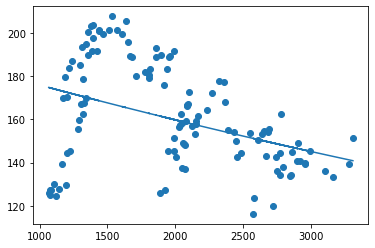

In [41]:
ols_model = OLS().fit(X,np.log(y))
ln_alpha, ln_beta = ols_model.coef_()
alpha,beta = np.exp(ln_alpha),np.exp(ln_beta)

y_hat = np.exp(ols_model.predict(X,y))
# y_hat = exponential_1(X,alpha,beta)
plt.scatter(X,y)
plt.plot(X,y_hat);